# Outdoor Activity Reduction from Poor AQI due to Wildfire Smoke

- **Purpose**: This notebook explores the reduction in outdoor activities due to poor air quality through a series of visualizations. By examining patterns in behavior, we aim to gain insights into how air quality impacts outdoor engagement and its implications for community well-being and economic outcomes.

- **Data Source**: data was sourced from [this Nature Data paper on human perception of and response to wildfire smoke](https://www.nature.com/articles/s41597-019-0251-y)

- **Objective**:
  - To provide a visual understanding of how air quality influences outdoor behavior.
  - To identify key trends and potential areas of concern for policymakers and community planners.

- **Outcome**: The insights from these visualizations will support decision-making by highlighting the tangible effects of air quality on outdoor activity. These results also help contextualize the economic and social impacts of reduced access to outdoor spaces due to smoke exposure.

### Imports

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### Function Definition

In [3]:
def gen_png_savepath(filename:str):
    save_path = os.path.join(viz_directory, filename)
    return save_path

### Load Data

In [2]:
input_directory = r"C:\Users\clark.roll\python coding\code_personal\Data512\Course Project\Data Analysis and Modeling\input_files"
viz_directory = r"C:\Users\clark.roll\python coding\code_personal\Data512\Course Project\Data Analysis and Modeling\visualizations\AQI"

In [4]:
survey = 'survey_activity_data.csv'
smoke_aqi = 'AQI_annual_data.csv'

# Full paths for each file
survey_path = os.path.join(input_directory, survey)
smoke_path = os.path.join(input_directory, smoke_aqi) 

# load dataframes
survey_df = pd.read_csv(survey_path)
smoke_df = pd.read_csv(smoke_path)

Lets take a gander at that data

In [5]:
# lets explore the survey data
survey_df.columns

Index(['participant_id', 'survey_type', 'outside_activity_engagement',
       'outside_activity_frequency', 'days_checked_for_smoke_info',
       'reduced_outdoor_activities_due_to_smoke',
       'consecutive_days_reduced_outdoor_activity', 'min_aqi_reduce_activity',
       'min_aqi_eliminate_activity',
       'motivating_info_to_reduce_outdoor_activity'],
      dtype='object')

### Data Cleaning

Lets remap some of the column entries so they will be more reasonable labels for a plot

In [6]:
activity_frequency_mapping = {
    'A few times per week': '~3 per week',
    'Once per week':        '~1 per week',
    'Less than once per week, but more than once per month': '~1-3 per month',
    'Rarely – A few times during the summer': '~1-3 per summer'}


# Update values in 'min_aqi_reduce_activity' and 'min_aqi_eliminate_activity' columns based on the given mappings. 
# These include linebreaks for better plotting
aqi_mapping = {
    'Green – Good': '0-50:\nGood',
    'Yellow – Moderate': '51-100:\nModerate',
    'Orange – Unhealthy for Sensitive Groups': '101-150:\nUnhealthy for\n Sensitive Grps.',
    'Red – Unhealthy': '151-200:\nUnhealthy',
    'Purple – Very Unhealthy': '201-300:\nVery Unhealthy',
    'Maroon – Hazardous':'301+:\nHazardous'}

In [7]:
# Apply the mappings to the relevant columns
survey_df['outside_activity_frequency']  = survey_df['outside_activity_frequency'].replace(activity_frequency_mapping)
survey_df['min_aqi_reduce_activity'] = survey_df['min_aqi_reduce_activity'].replace(aqi_mapping)
survey_df['min_aqi_eliminate_activity'] = survey_df['min_aqi_eliminate_activity'].replace(aqi_mapping)

In [8]:
sns.set_style("whitegrid")

How did people respond to whether they would reduce their outdoor activity due to smoke?

In [39]:
subset_df = survey_df[['participant_id',
                       "reduced_outdoor_activities_due_to_smoke",
                       "outside_activity_frequency",
                       "min_aqi_reduce_activity",
                       "min_aqi_eliminate_activity",]]
subset_df = subset_df.dropna()
subset_df = subset_df[subset_df['reduced_outdoor_activities_due_to_smoke'] != 'Not applicable']
subset_df.to_csv('activity_survey_subset.csv', index = False)

In [36]:
subset_df

,participant_id,reduced_outdoor_activities_due_to_smoke,outside_activity_frequency,min_aqi_reduce_activity,min_aqi_eliminate_activity
0,Participant 1,No,Daily,I am not familiar with this rating,I am not familiar with this rating
1,Participant 1,Yes,Daily,151-200:\nUnhealthy,201-300:\nVery Unhealthy
2,Participant 10,No,Daily,I am not familiar with this rating,301+:\nHazardous
3,Participant 10,Yes,Daily,101-150:\nUnhealthy for\n Sensitive Grps.,151-200:\nUnhealthy
4,Participant 100,No,Daily,I am not familiar with this rating,I am not familiar with this rating
...,...,...,...,...,...
2354,Participant 994,Yes,Daily,51-100:\nModerate,101-150:\nUnhealthy for\n Sensitive Grps.
2355,Participant 995,Yes,~1 per week,101-150:\nUnhealthy for\n Sensitive Grps.,101-150:\nUnhealthy for\n Sensitive Grps.
2357,Participant 997,No,~3 per week,201-300:\nVery Unhealthy,301+:\nHazardous
2358,Participant 998,Yes,~1 per week,101-150:\nUnhealthy for\n Sensitive Grps.,151-200:\nUnhealthy


### Plot the frequency of certain categories

In [9]:
# Clean the data by dropping NaN entries in `outside_activity_frequency`
freq_df = survey_df[['outside_activity_frequency', 'reduced_outdoor_activities_due_to_smoke']].copy()
freq_df = freq_df.dropna()
freq_df = freq_df[freq_df['reduced_outdoor_activities_due_to_smoke'] != 'Not applicable']

reduced_outdoor_activities_due_to_smoke
Yes    72.385142
No     27.614858
Name: proportion, dtype: float64


C:\Users\clark.roll\AppData\Local\Temp\ipykernel_37324\26390027.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = freq_df['reduced_outdoor_activities_due_to_smoke'].value_counts()[index]
C:\Users\clark.roll\AppData\Local\Temp\ipykernel_37324\26390027.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = freq_df['reduced_outdoor_activities_due_to_smoke'].value_counts()[index]


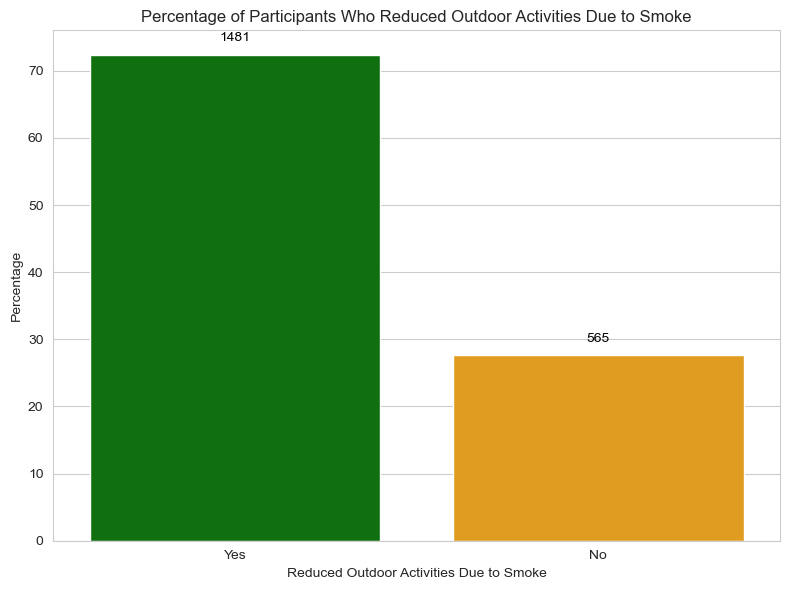

In [10]:
# Calculate the percentage of each unique value in a specific column ('reduced_outdoor_activities_due_to_smoke')
percentage_counts = freq_df['reduced_outdoor_activities_due_to_smoke'].value_counts(normalize=True) * 100

# Display the percentage counts
print(percentage_counts)

# Plot the percentages using a bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x=percentage_counts.index, 
    y=percentage_counts.values, 
    hue=percentage_counts.index,
    palette={'No': 'orange', 'Yes': 'green'},
    legend=False
)

# Add count labels on top of the bars
for index, value in enumerate(percentage_counts.values):
    count = freq_df['reduced_outdoor_activities_due_to_smoke'].value_counts()[index]
    ax.text(index, value + 2, f'{count}', color='black', ha="center")

# Set labels and title
plt.xlabel('Reduced Outdoor Activities Due to Smoke')
plt.ylabel('Percentage')
plt.title('Percentage of Participants Who Reduced Outdoor Activities Due to Smoke')

# Save the plot to the specified file path
plt.tight_layout()
filepath = gen_png_savepath('reduced_outdoor_activities_percentage_with_counts.png')
plt.savefig(filepath)

# display the plot
plt.show()

### Plot Frequency by outdoor activity level

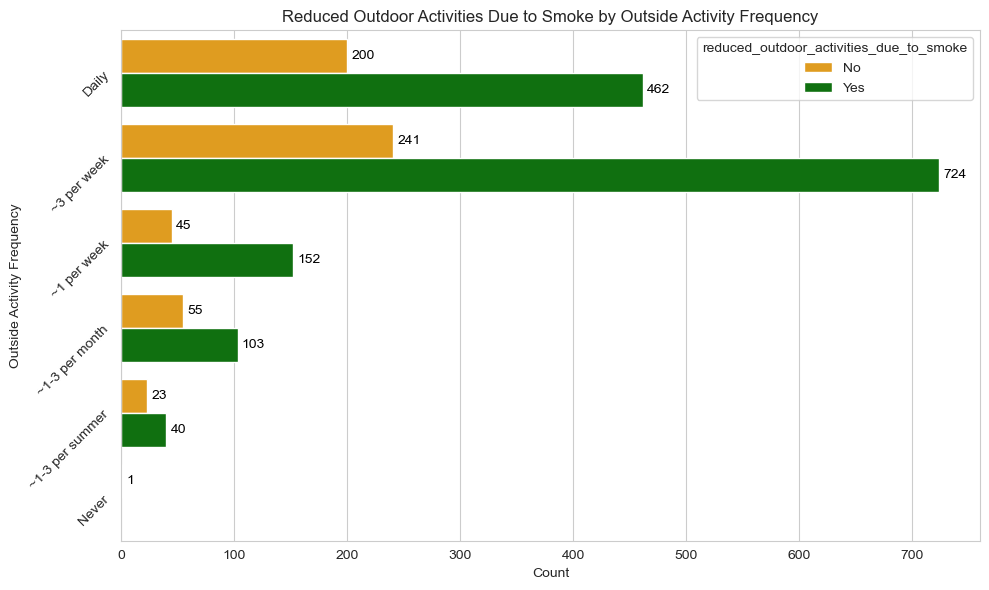

In [11]:
# Define the desired order for the categories
desired_order = ['Daily', '~3 per week', '~1 per week', '~1-3 per month', '~1-3 per summer', 'Never']

# Set up the figure and plot using seaborn with custom colors
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='outside_activity_frequency',
                   hue='reduced_outdoor_activities_due_to_smoke',
                   data=freq_df,
                   palette={'No': 'orange', 'Yes': 'green'})

# Set labels and title
plt.ylabel('Outside Activity Frequency')
plt.xlabel('Count')
plt.title('Reduced Outdoor Activities Due to Smoke by Outside Activity Frequency')

# Add count labels to each bar
for container in ax.containers:
    # Add labels to each bar in the container
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, color='black')

# Rotate x-axis labels for better readability
plt.yticks(rotation=45)


# Save the plot to the specified file path
plt.tight_layout()
filepath = gen_png_savepath('reduced_outdoor_by_activity_frequency_count.png')
plt.savefig(filepath)

# display the plot
plt.show()

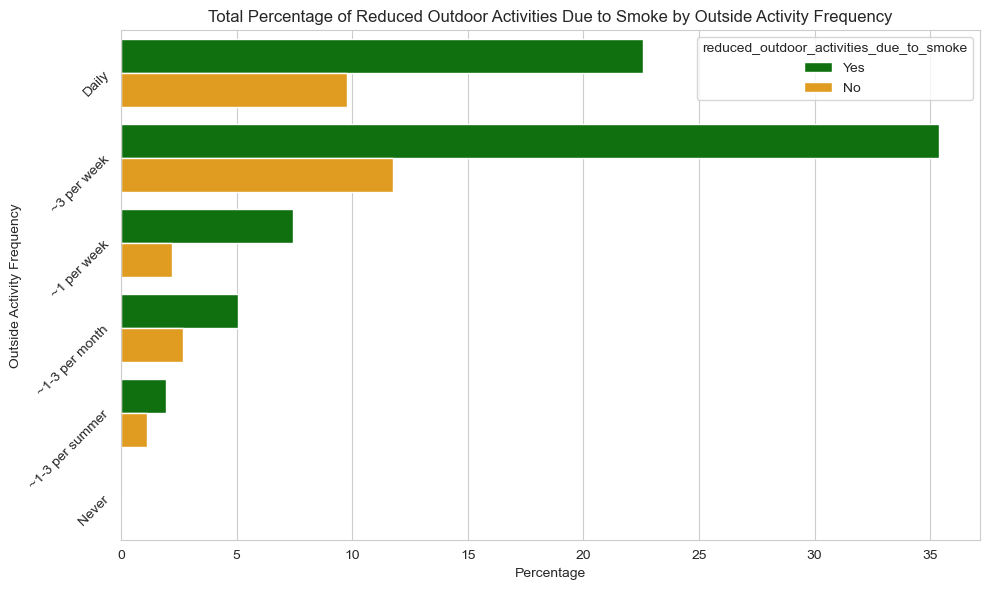

In [12]:
# Calculate the total percentage for 'Yes' and 'No' responses across each category of 'outside_activity_frequency'
# without normalizing within groups
total_counts = (
    freq_df.groupby('outside_activity_frequency')['reduced_outdoor_activities_due_to_smoke']
    .value_counts()
    .rename('count')
    .reset_index()
)

# Calculate percentage relative to the total dataset
total_counts['percentage'] = (total_counts['count'] / len(freq_df)) * 100

# Define the desired order for the categories
desired_order = ['Daily', '~3 per week', '~1 per week', '~1-3 per month', '~1-3 per summer', 'Never']

# Set up the figure and plot using seaborn with custom colors
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    y='outside_activity_frequency',
    x='percentage',
    hue='reduced_outdoor_activities_due_to_smoke',
    data=total_counts,
    palette={'No': 'orange', 'Yes': 'green'},
    order=desired_order
)

# Set labels and title
plt.ylabel('Outside Activity Frequency')
plt.xlabel('Percentage')
plt.title('Total Percentage of Reduced Outdoor Activities Due to Smoke by Outside Activity Frequency')

# Rotate y-axis labels for better readability
plt.yticks(rotation=45)

# Save the plot to the specified file path
plt.tight_layout()
filepath = gen_png_savepath('reduced_outdoor_by_activity_frequency_percent.png')
plt.savefig(filepath)

# Display the plot
plt.show()

In [21]:
# Filter data for those who said "Yes" to reducing outdoor activities due to smoke
df_yes_reduced = survey_df[survey_df['reduced_outdoor_activities_due_to_smoke'] == 'Yes'].copy()
df_yes_reduced = df_yes_reduced[["reduced_outdoor_activities_due_to_smoke",
                                  "min_aqi_reduce_activity",
                                 "min_aqi_eliminate_activity"]]
                                 

In [24]:
df_yes_reduced

,reduced_outdoor_activities_due_to_smoke,min_aqi_reduce_activity,min_aqi_eliminate_activity
1,Yes,151-200:\nUnhealthy,201-300:\nVery Unhealthy
3,Yes,101-150:\nUnhealthy for\n Sensitive Grps.,151-200:\nUnhealthy
5,Yes,101-150:\nUnhealthy for\n Sensitive Grps.,151-200:\nUnhealthy
6,Yes,51-100:\nModerate,101-150:\nUnhealthy for\n Sensitive Grps.
7,Yes,151-200:\nUnhealthy,301+:\nHazardous
...,...,...,...
2353,Yes,101-150:\nUnhealthy for\n Sensitive Grps.,101-150:\nUnhealthy for\n Sensitive Grps.
2354,Yes,51-100:\nModerate,101-150:\nUnhealthy for\n Sensitive Grps.
2355,Yes,101-150:\nUnhealthy for\n Sensitive Grps.,101-150:\nUnhealthy for\n Sensitive Grps.
2356,Yes,151-200:\nUnhealthy,301+:\nHazardous


In [22]:
# Define the order for the AQI categories
aqi_order = [
    '0-50:\nGood', '51-100:\nModerate', '101-150:\nUnhealthy for\n Sensitive Grps.',
    '151-200:\nUnhealthy', '201-300:\nVery Unhealthy', '301+:\nHazardous'
]

# Define custom color map for the categories
aqi_palette = {
    '0-50:\nGood': 'green',
    '51-100:\nModerate': 'yellow',
    '101-150:\nUnhealthy for\n Sensitive Grps.': 'orange',
    '151-200:\nUnhealthy': 'red',
    '201-300:\nVery Unhealthy': 'purple',
    '301+:\nHazardous': 'maroon'
}

C:\Users\clark.roll\AppData\Local\Temp\ipykernel_37324\4156265091.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


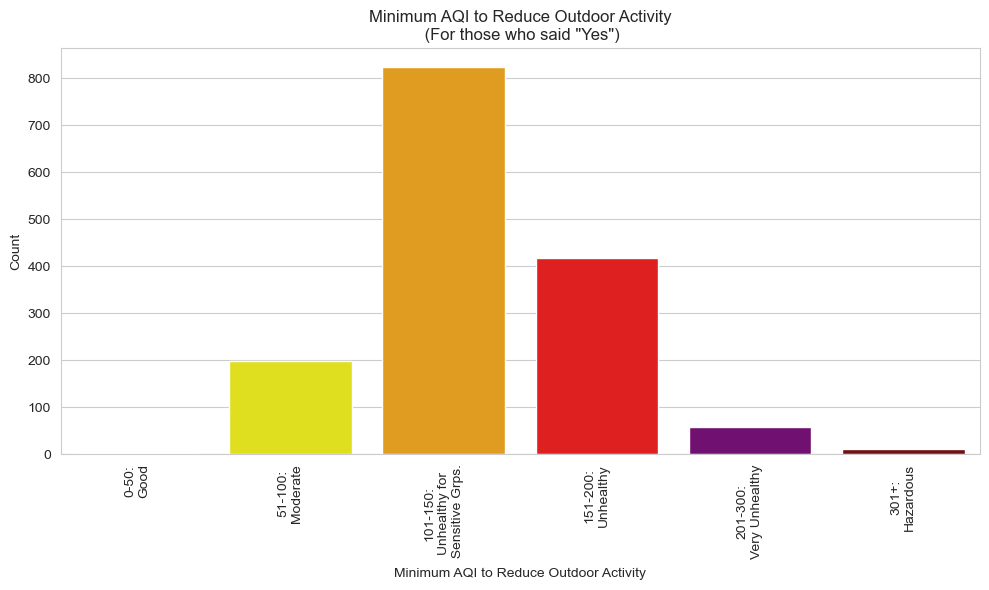

C:\Users\clark.roll\AppData\Local\Temp\ipykernel_37324\4156265091.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


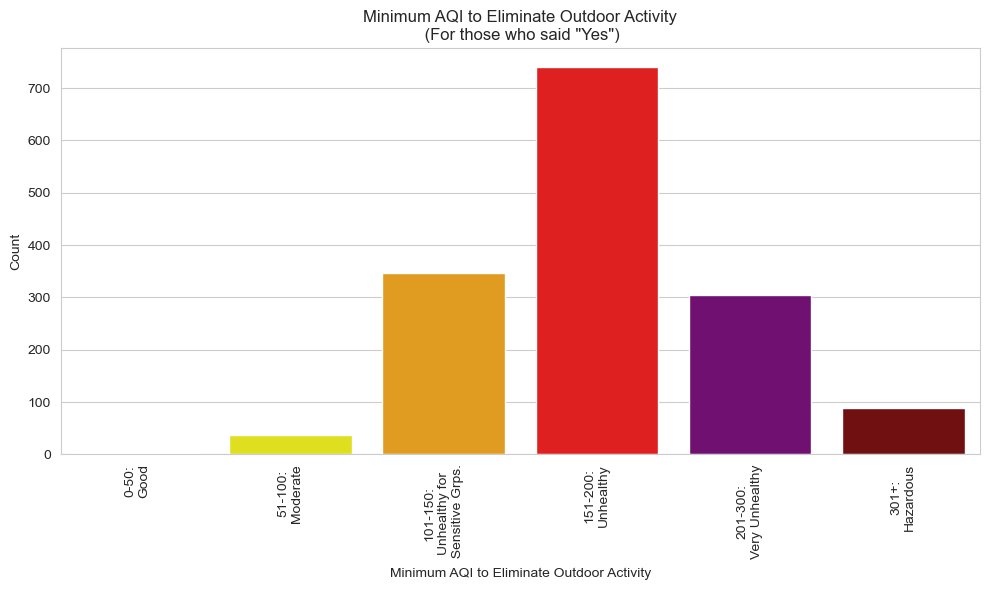

In [23]:
# Plot for 'min_aqi_reduce_activity' if column exists
if 'min_aqi_reduce_activity' in df_yes_reduced.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(
        x='min_aqi_reduce_activity',
        data=df_yes_reduced,
        order=aqi_order,
        palette=aqi_palette
    )
    
    # Set labels and title for min_aqi_reduce_activity plot
    plt.xlabel('Minimum AQI to Reduce Outdoor Activity')
    plt.ylabel('Count')
    plt.title('Minimum AQI to Reduce Outdoor Activity\n (For those who said "Yes")')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)
    
    # Display the plot and save figure
    plt.tight_layout()
    filepath = gen_png_savepath('min_aqi_reduce_activity_count.png')
    plt.savefig(filepath)
    
    plt.show()
####################################################################
# Plot for 'min_aqi_eliminate_activity' if column exists
if 'min_aqi_eliminate_activity' in df_yes_reduced.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(
        x='min_aqi_eliminate_activity',
        data=df_yes_reduced,
        order=aqi_order,
        palette=aqi_palette
    )
    
    # Set labels and title for min_aqi_eliminate_activity plot
    plt.xlabel('Minimum AQI to Eliminate Outdoor Activity')
    plt.ylabel('Count')
    plt.title('Minimum AQI to Eliminate Outdoor Activity\n (For those who said "Yes")')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)
    
    # Display the plot and save figure
    plt.tight_layout()
    filepath = gen_png_savepath('min_aqi_eliminate_activity_count.png')
    plt.savefig(filepath)
    
    plt.show()

C:\Users\clark.roll\AppData\Local\Temp\ipykernel_37324\2684135298.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


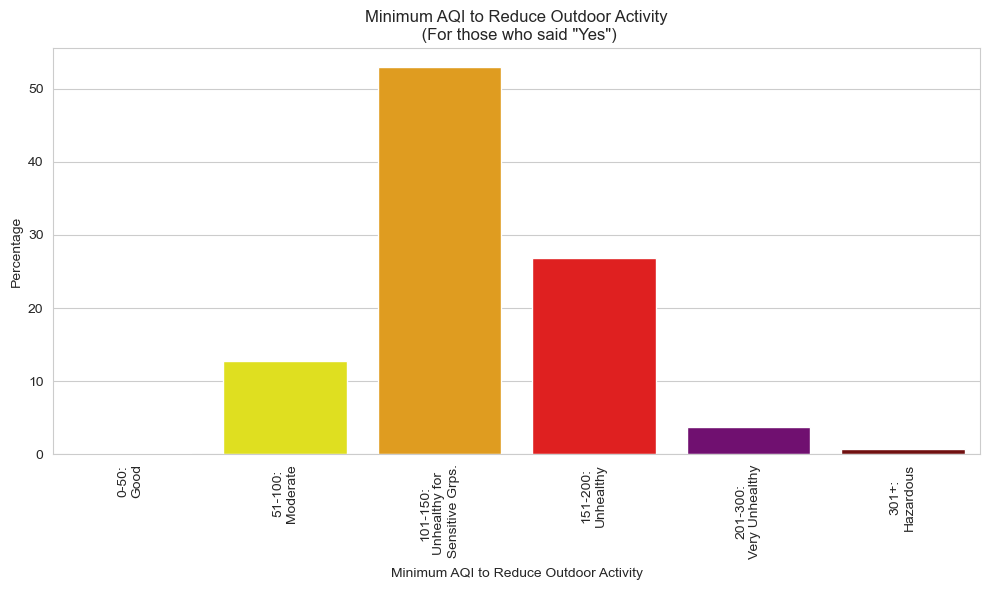

C:\Users\clark.roll\AppData\Local\Temp\ipykernel_37324\2684135298.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


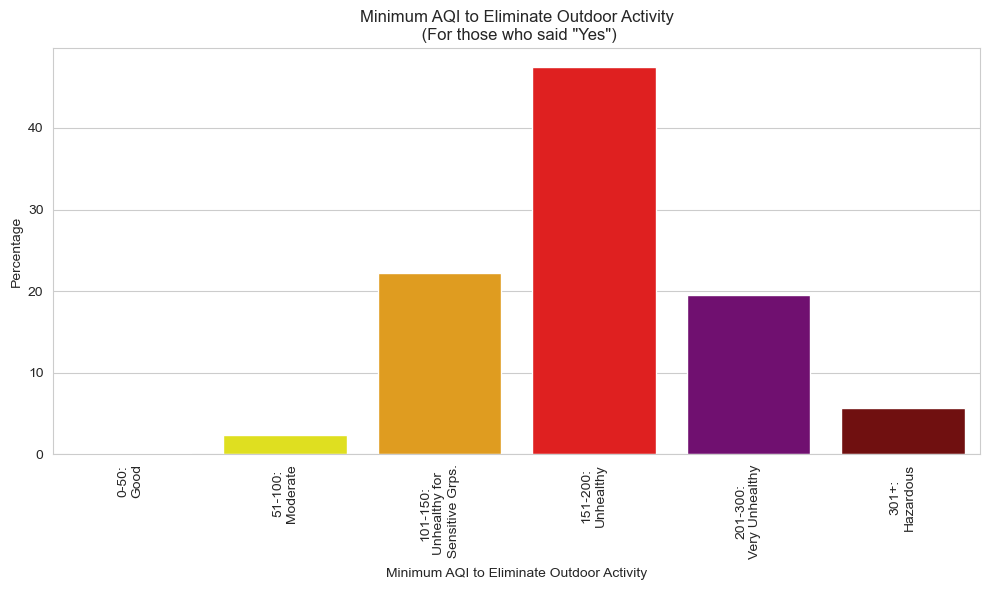

In [19]:
# Plotting percentage rather than counts for 'min_aqi_reduce_activity'
if 'min_aqi_reduce_activity' in df_yes_reduced.columns:
    # Calculate the percentage of each AQI level
    reduce_percentage = (
        df_yes_reduced['min_aqi_reduce_activity'].value_counts(normalize=True)
        .reindex(aqi_order, fill_value=0)
        .mul(100)
    )

    # Plot the percentages for 'min_aqi_reduce_activity'
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=reduce_percentage.index,
        y=reduce_percentage.values,
        palette=aqi_palette
    )
    
    # Set labels and title for min_aqi_reduce_activity plot
    plt.xlabel('Minimum AQI to Reduce Outdoor Activity')
    plt.ylabel('Percentage')
    plt.title('Minimum AQI to Reduce Outdoor Activity\n (For those who said "Yes")')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)
    
    # Display the plot and save figure
    plt.tight_layout()
    filepath = 'min_aqi_reduce_activity_percentage.png'
    plt.savefig(filepath)
    
    plt.show()

####################################################################
# Plotting percentage rather than counts for 'min_aqi_eliminate_activity'
if 'min_aqi_eliminate_activity' in df_yes_reduced.columns:
    # Calculate the percentage of each AQI level
    eliminate_percentage = (
        df_yes_reduced['min_aqi_eliminate_activity'].value_counts(normalize=True)
        .reindex(aqi_order, fill_value=0)
        .mul(100)
    )

    # Plot the percentages for 'min_aqi_eliminate_activity'
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=eliminate_percentage.index,
        y=eliminate_percentage.values,
        palette=aqi_palette
    )
    
    # Set labels and title for min_aqi_eliminate_activity plot
    plt.xlabel('Minimum AQI to Eliminate Outdoor Activity')
    plt.ylabel('Percentage')
    plt.title('Minimum AQI to Eliminate Outdoor Activity\n (For those who said "Yes")')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)
    
    # Display the plot and save figure
    plt.tight_layout()
    filepath = 'min_aqi_eliminate_activity_percentage.png'
    plt.savefig(filepath)
    
    plt.show()

In [41]:
combined_df.to_csv('activity_reduction_perc_by_AQI.csv', index=False)
combined_df

In [42]:
combined_df

,AQI Category,Action,Percentage
0,0-50:\nGood,Reduce,0.192926
1,51-100:\nModerate,Reduce,12.733119
2,101-150:\nUnhealthy for\n Sensitive Grps.,Reduce,52.926045
3,151-200:\nUnhealthy,Reduce,26.881029
4,201-300:\nVery Unhealthy,Reduce,3.794212
5,301+:\nHazardous,Reduce,0.771704
6,0-50:\nGood,Eliminate,0.192308
7,51-100:\nModerate,Eliminate,2.371795
8,101-150:\nUnhealthy for\n Sensitive Grps.,Eliminate,22.179487
9,151-200:\nUnhealthy,Eliminate,47.435897


In [26]:
# Calculate the percentage for both 'min_aqi_reduce_activity' and 'min_aqi_eliminate_activity'
reduce_percentage = (
    df_yes_reduced['min_aqi_reduce_activity'].value_counts(normalize=True)
    .reindex(aqi_order, fill_value=0)
    .mul(100)
)

eliminate_percentage = (
    df_yes_reduced['min_aqi_eliminate_activity'].value_counts(normalize=True)
    .reindex(aqi_order, fill_value=0)
    .mul(100)
)

# Create a combined DataFrame for plotting
combined_df = pd.DataFrame({
    'AQI Category': aqi_order,
    'Reduce': reduce_percentage.values,
    'Eliminate': eliminate_percentage.values
}).melt(id_vars='AQI Category', var_name='Action', value_name='Percentage')


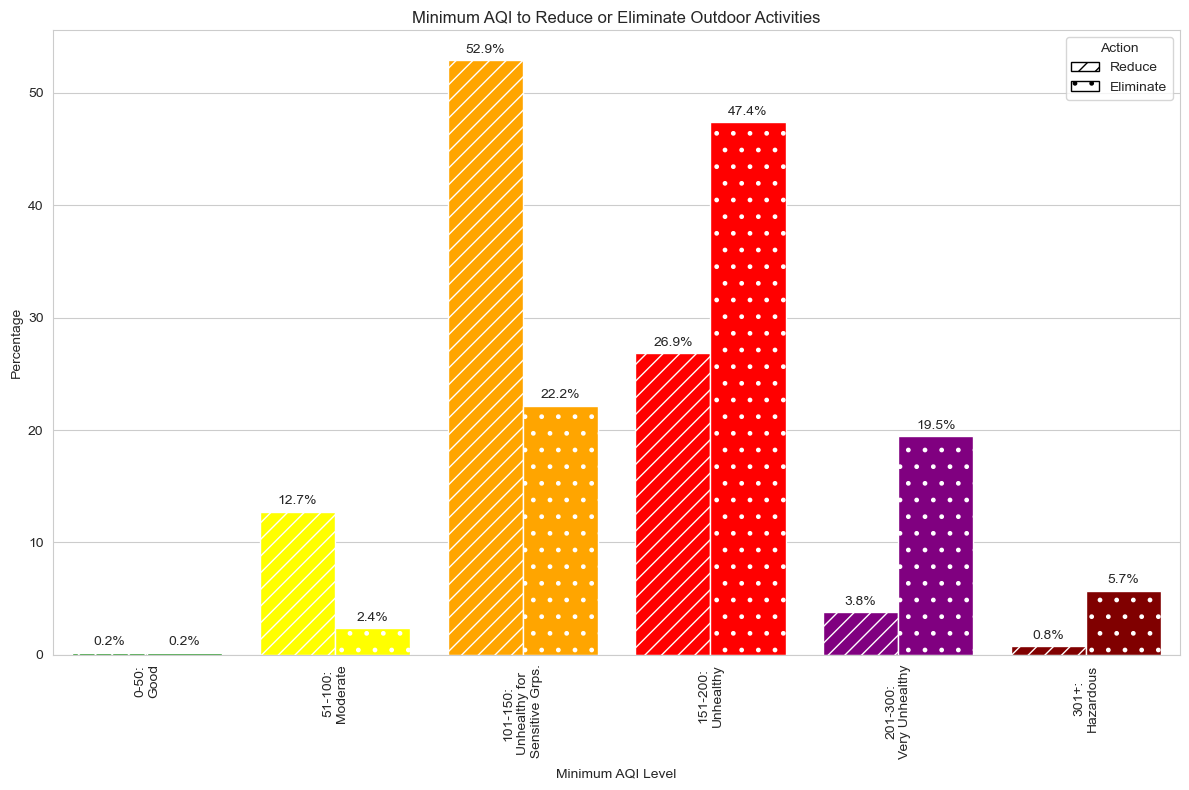

In [34]:
# Set up the figure and plot
plt.figure(figsize=(12, 8))
axis = sns.barplot(
    x='AQI Category',
    y='Percentage',
    hue='Action',
    data=combined_df,
    dodge=True
)

# Apply colors and hatches manually to match the AQI palette
hatches = {'Reduce': '//', 'Eliminate': '.'}
patch_index = 0

for index, action in enumerate(combined_df['Action']):
    bar_patch = axis.patches[patch_index]
    aqi_category = combined_df['AQI Category'].iloc[index]
    color = aqi_palette[aqi_category]
    
    # Set color and hatch for the bar patch
    bar_patch.set_facecolor(color)
    bar_patch.set_hatch(hatches[action])
    
    patch_index += 1

# Add percentage labels on top of each bar
for bar_container in axis.containers:
    axis.bar_label(bar_container, fmt='%.1f%%', label_type='edge', padding=3)

# Set labels and title
plt.xlabel('Minimum AQI Level')
plt.ylabel('Percentage')
plt.title('Minimum AQI to Reduce or Eliminate Outdoor Activities')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Create custom legend with hatches
reduce_patch = mpatches.Patch(facecolor='white', edgecolor='black', hatch=hatches['Reduce'], label='Reduce')
eliminate_patch = mpatches.Patch(facecolor='white', edgecolor='black', hatch=hatches['Eliminate'], label='Eliminate')
plt.legend(handles=[reduce_patch, eliminate_patch], title='Action', loc='upper right')

# Display the plot and save the figure
plt.tight_layout()
file_path = 'combined_aqi_reduce_eliminate_activity_percentage_custom_legend_updated.png'
plt.savefig(file_path)

plt.show()